In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import ipywidgets as widgets
from pathlib import Path
import os
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np


In [4]:
project_root = Path(os.getcwd()).parent
image_path = project_root / "assets" / "sprites" / "disco_ball" / "default.png"

In [5]:
img = Image.open(image_path).convert("RGBA")
print('shape of img: ', img.size)

shape of img:  (2268, 1701)


In [8]:
#find min and max x, y where alpha>thresh
alpha = np.array(img.split()[-1])
thresh = 1
ymin, ymax, xmin, xmax = np.min(np.where(alpha>thresh)[0]), np.max(np.where(alpha>thresh)[0]), np.min(np.where(alpha>thresh)[1]), np.max(np.where(alpha>thresh)[1])
print(f"xmin: {xmin}, xmax: {xmax}, ymin: {ymin}, ymax: {ymax}")

xmin: 453, xmax: 1814, ymin: 170, ymax: 1530


In [10]:
cropped = img.crop((xmin-1, ymin-1, xmax+1, ymax+1))
cropped.save(project_root / "assets" / "sprites" / "disco_ball" / "cropped.png")

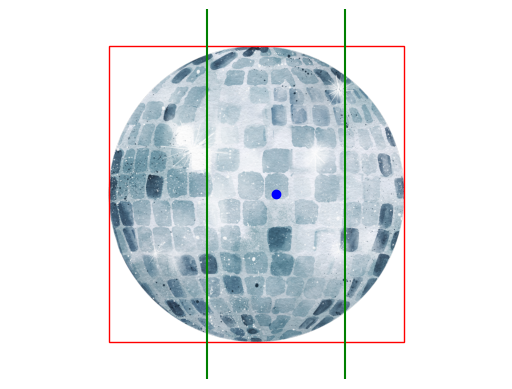

In [9]:
deltax = xmax - xmin
deltay = ymax - ymin
startx = xmin
starty = ymin
left_collider_x = startx + (1/3)*deltax
right_collider_x = startx + 0.8*deltax
centroid = ((left_collider_x+right_collider_x)/2, starty+(1/2)*deltay)
plt.imshow(img)
plt.axis("off")
rect = Rectangle((startx, starty), deltax, deltay, linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)
plt.scatter(*centroid, color='blue')
plt.axvline(x=left_collider_x, color='green')
plt.axvline(x=right_collider_x, color='green')
plt.show()

(np.float64(-0.5), np.float64(1691.5), np.float64(1275.5), np.float64(-0.5))

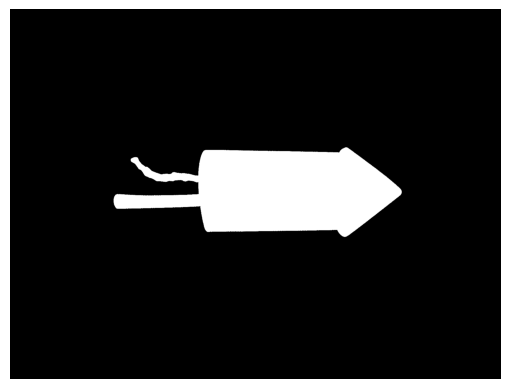

In [46]:
#plot alpha mask

plt.imshow(alpha>50, cmap='gray')
plt.axis("off")

xmin: 242, xmax: 1412, ymin: 661, ymax: 1177


In [ ]:
def show(angle):
    rot = img.rotate(angle, resample=Image.BICUBIC)
    plt.imshow(rot)
    plt.axis("off")
slider = widgets.IntSlider(min=-180, max=180, step=1, value=0, continuous_update=False)
widgets.interact(show, angle=slider)

In [12]:

angle = widgets.FloatSlider(min=-180, max=180, step=1, value=0, continuous_update=False)
save_btn = widgets.Button(description="Save PNG")
out = widgets.Output()

def render():
    rot = img.rotate(angle.value, resample=Image.BICUBIC, expand=True)
    with out:
        clear_output(wait=True)
        plt.figure(figsize=(5,5))
        plt.imshow(rot)
        plt.axis("off")
        plt.show()

def on_angle_change(change):
    render()

def on_save(_):
    rot = img.rotate(angle.value, resample=Image.BICUBIC, expand=True)
    fname = image_path.parent / "default.png"
    rot.save(fname)
    with out:
        print(f"Saved: {fname}")

angle.observe(on_angle_change, names="value")
save_btn.on_click(on_save)

display(angle, save_btn, out)
render()


FloatSlider(value=0.0, continuous_update=False, max=180.0, min=-180.0, step=1.0)

Button(description='Save PNG', style=ButtonStyle())

Output()